In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

label_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
class_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import specificity_score

classifiers = ["SVM", "KNN", "RFC", "GNB", "LR"]
precision_metrics = {}
recall_metrics = {}
f1score_metrics = {}
specificity_metrics = {}
accuracy_metrics = ()

for classifier in classifiers:
    pet = classifier.replace('"', '')
    fold_0 = pd.read_csv(fr"C:\Users\ASUS\OneDrive - University of the Philippines\Desktop\University of the Philippines\Fourth Year Second Sem\MATH 190\Project Proper\k fold cross-validation\Without PCA\{pet}\Fold 0.csv")
    fold_1 = pd.read_csv(fr"C:\Users\ASUS\OneDrive - University of the Philippines\Desktop\University of the Philippines\Fourth Year Second Sem\MATH 190\Project Proper\k fold cross-validation\Without PCA\{pet}\Fold 1.csv")
    fold_2 = pd.read_csv(fr"C:\Users\ASUS\OneDrive - University of the Philippines\Desktop\University of the Philippines\Fourth Year Second Sem\MATH 190\Project Proper\k fold cross-validation\Without PCA\{pet}\Fold 2.csv")
    fold_3 = pd.read_csv(fr"C:\Users\ASUS\OneDrive - University of the Philippines\Desktop\University of the Philippines\Fourth Year Second Sem\MATH 190\Project Proper\k fold cross-validation\Without PCA\{pet}\Fold 3.csv")
    fold_4 = pd.read_csv(fr"C:\Users\ASUS\OneDrive - University of the Philippines\Desktop\University of the Philippines\Fourth Year Second Sem\MATH 190\Project Proper\k fold cross-validation\Without PCA\{pet}\Fold 4.csv")
    
    fold0_true = fold_0.iloc[1:,0]
    fold0_pred = fold_0.iloc[1:,1]

    fold1_true = fold_1.iloc[1:,0]
    fold1_pred = fold_1.iloc[1:,1]

    fold2_true = fold_2.iloc[1:,0]
    fold2_pred = fold_2.iloc[1:,1]

    fold3_true = fold_3.iloc[1:,0]
    fold3_pred = fold_3.iloc[1:,1]

    fold4_true = fold_4.iloc[1:,0]
    fold4_pred = fold_4.iloc[1:,1]
    
    # Accuracy
    accu = [accuracy_score(fold0_true, fold0_pred),
            accuracy_score(fold1_true, fold1_pred), 
            accuracy_score(fold2_true, fold2_pred),
            accuracy_score(fold3_true, fold3_pred),
            accuracy_score(fold4_true, fold4_pred)]
    accu = np.mean(accu)
    accuracy_metrics = np.append(accuracy_metrics, accu)
    
    # Precision
    prec = np.vstack([
        precision_score(fold_true, fold_pred, average=None)
        for fold_true, fold_pred in zip([fold0_true, fold1_true, fold2_true, fold3_true, fold4_true],
                                         [fold0_pred, fold1_pred, fold2_pred, fold3_pred, fold4_pred])
    ])
    prec_result = np.mean(prec, axis=0)
    precision_metrics[classifier] = prec_result.tolist() ### Precision Result
    
    
    # Recall
    rec = np.vstack([
        recall_score(fold_true, fold_pred, average=None)
        for fold_true, fold_pred in zip([fold0_true, fold1_true, fold2_true, fold3_true, fold4_true],
                                         [fold0_pred, fold1_pred, fold2_pred, fold3_pred, fold4_pred])
    ])
    rec_result = np.mean(rec, axis=0)
    recall_metrics[classifier] = rec_result.tolist() ### Recall Result
    
    
    # F1 Score
    fscor = np.vstack([
        f1_score(fold_true, fold_pred, average=None)
        for fold_true, fold_pred in zip([fold0_true, fold1_true, fold2_true, fold3_true, fold4_true],
                                         [fold0_pred, fold1_pred, fold2_pred, fold3_pred, fold4_pred])
    ])
    fscor_result = np.mean(fscor, axis=0)
    f1score_metrics[classifier] = fscor_result.tolist() #f1 score result
    
    # Specificity
    spec = np.vstack([
        specificity_score(fold_true, fold_pred, average=None)
        for fold_true, fold_pred in zip([fold0_true, fold1_true, fold2_true, fold3_true, fold4_true],
                                         [fold0_pred, fold1_pred, fold2_pred, fold3_pred, fold4_pred])
    ])
    specificity_result = np.mean(spec, axis=0)
    specificity_metrics[classifier] = specificity_result.tolist() # Specificity result


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

In [3]:
precision = pd.DataFrame(precision_metrics)
precision.to_csv("precision_report.csv", index = class_list)
recall = pd.DataFrame(recall_metrics)
recall.to_csv("recall_report.csv", index = class_list)
f1score = pd.DataFrame(f1score_metrics)
f1score.to_csv("f1score_report.csv", index = class_list)
specificity = pd.DataFrame(specificity_metrics)
specificity.to_csv("Specificity_report.csv", index = class_list)
accuracy = pd.DataFrame(accuracy_metrics)
accuracy.to_csv("accuracy_report.csv", index = classifiers)

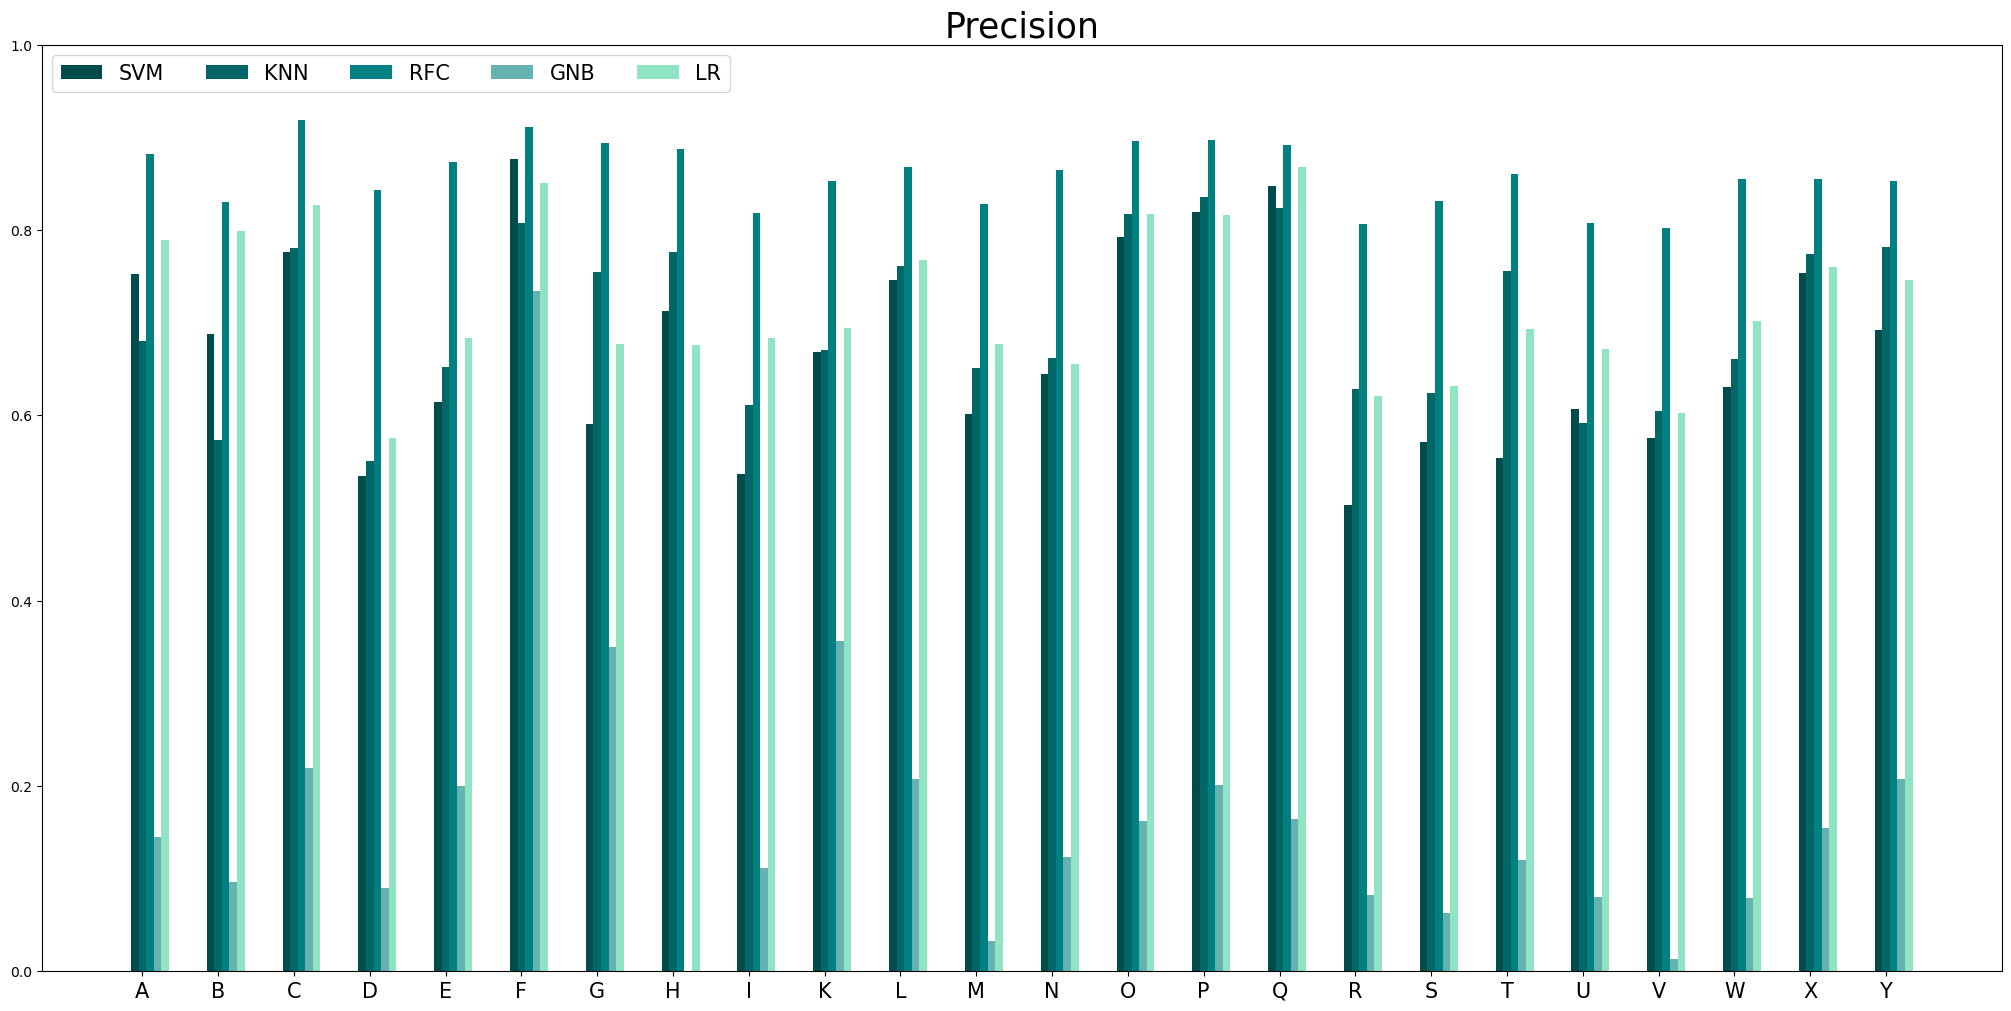

In [4]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#004c4c', '#006666', '#008080', '#66b2b2', '#90E4C1', '#b2d8d8' ]
x = np.arange(len(class_list))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (20, 10))

for attribute, measurement in precision_metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, color = colors[multiplier])
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Precision', fontsize = 25)
ax.set_xticks(x + width, class_list, fontsize = 15)
ax.set_ylim(0, 1)
ax.legend(classifiers, loc='upper left', fontsize = 15, ncol=len(classifiers))

plt.show()

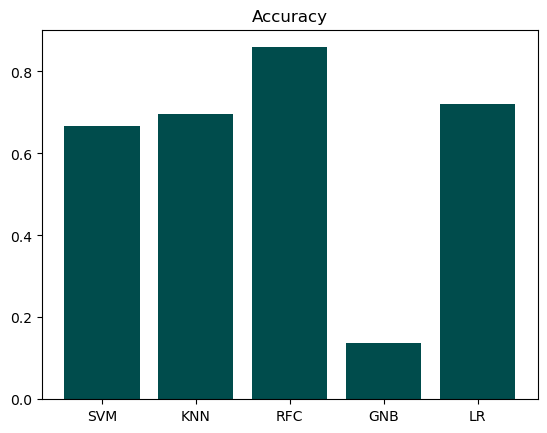

In [5]:
plt.bar(classifiers, accuracy_metrics, color = '#004c4c')
plt.title('Accuracy')
plt.show()

In [6]:
accuracy_metrics

array([0.81936216, 0.81976652, 0.82955764, 0.38383076, 0.45886982])

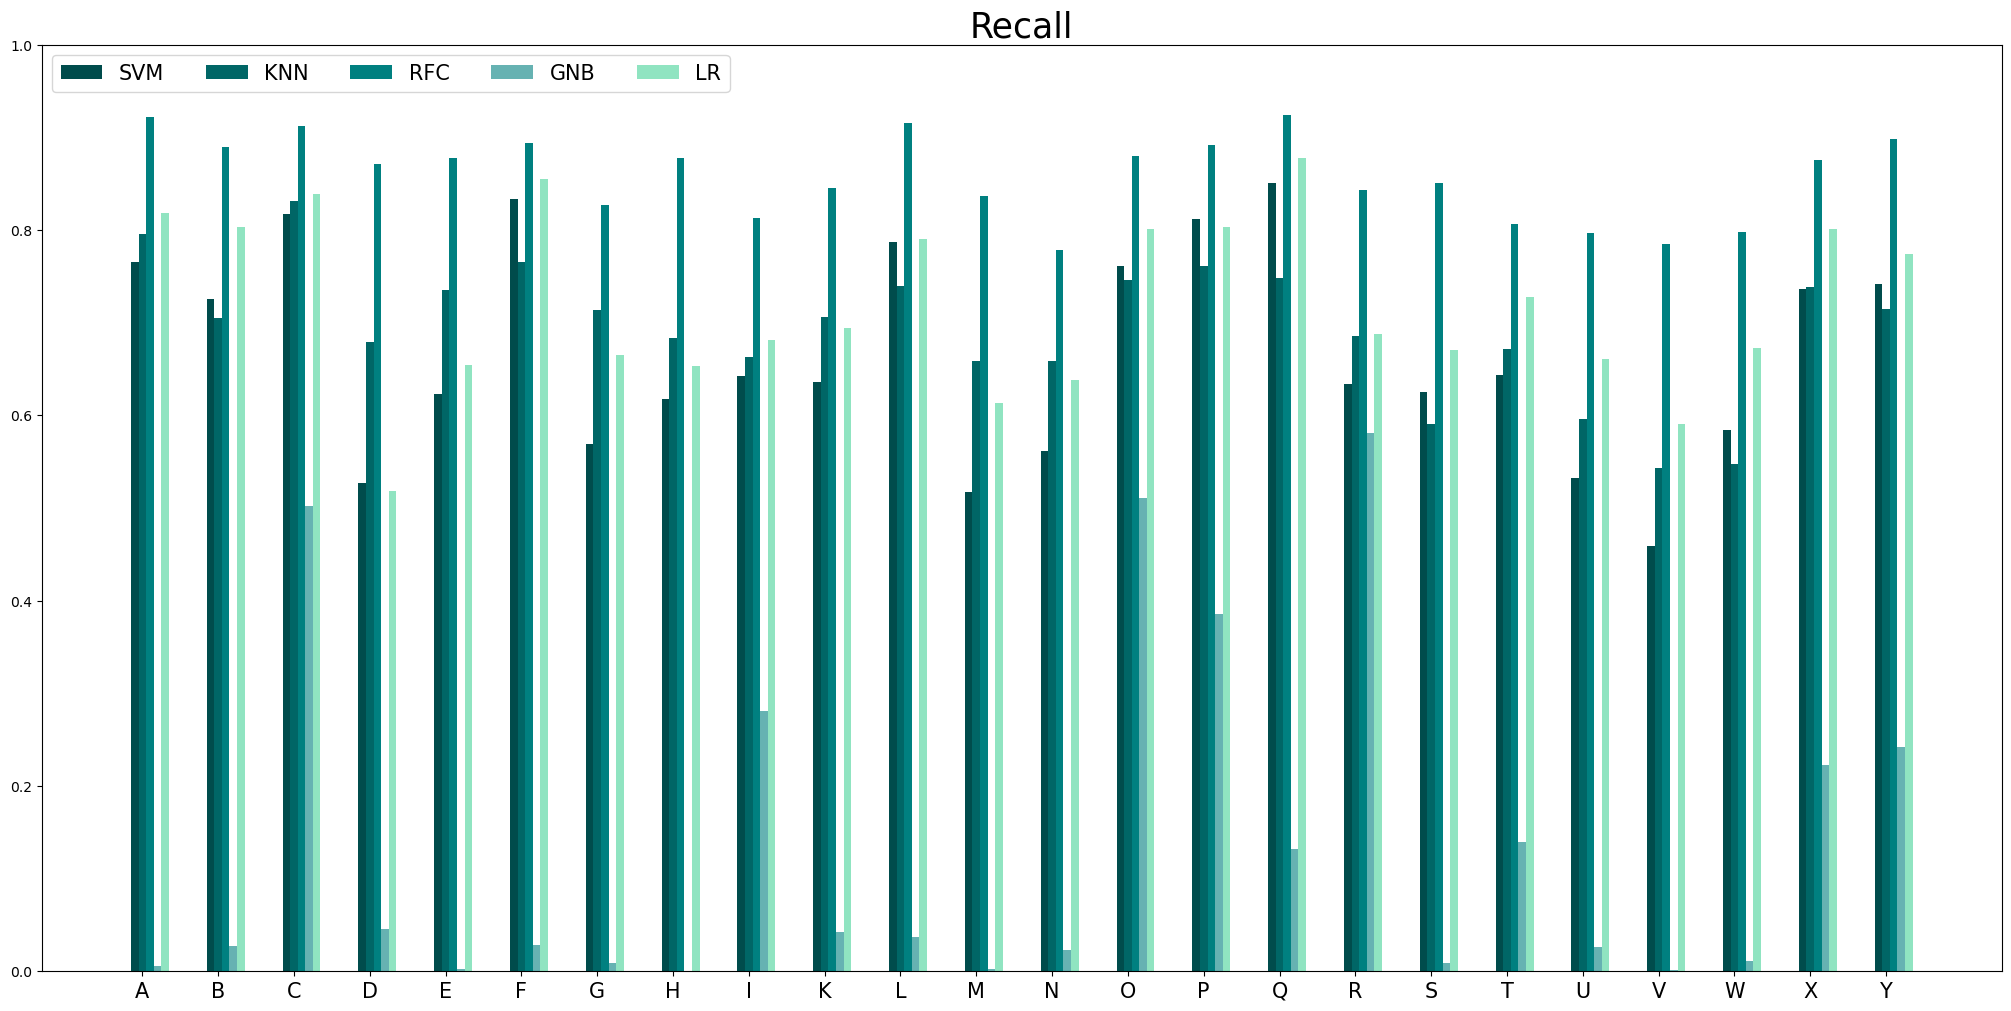

In [6]:
colors = ['#004c4c', '#006666', '#008080', '#66b2b2', '#90E4C1', '#b2d8d8' ]
x = np.arange(len(class_list))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (20, 10))

for attribute, measurement in recall_metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, color = colors[multiplier])
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Recall', fontsize = 25)
ax.set_xticks(x + width, class_list, fontsize = 15)
ax.set_ylim(0, 1)
ax.legend(classifiers, loc='upper left', fontsize = 15, ncol=len(classifiers))

plt.show()

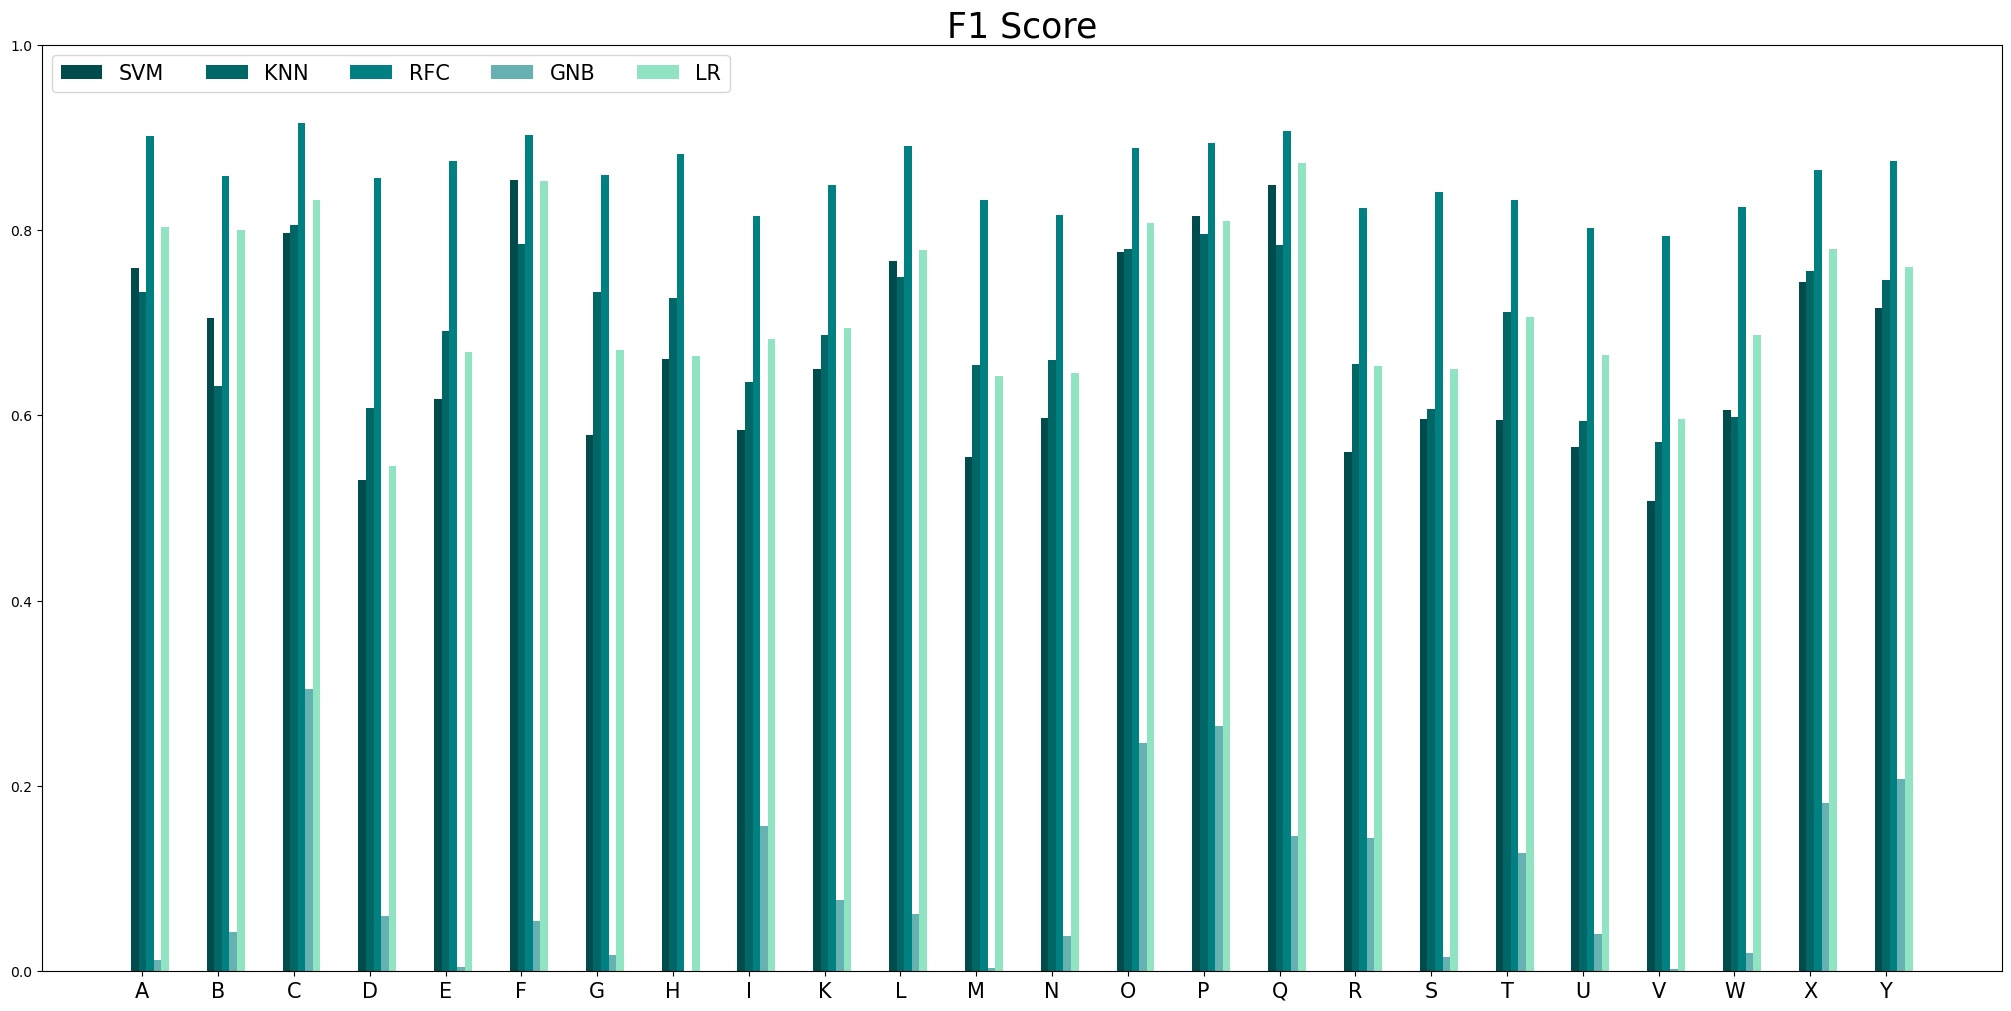

In [10]:
colors = ['#004c4c', '#006666', '#008080', '#66b2b2', '#90E4C1', '#b2d8d8' ]
x = np.arange(len(class_list))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (20, 10))

for attribute, measurement in f1score_metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, color = colors[multiplier])
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('F1 Score', fontsize = 25)
ax.set_xticks(x + width, class_list, fontsize = 15)
ax.set_ylim(0, 1)
ax.legend(classifiers, loc='upper left', fontsize = 15, ncol=len(classifiers))

plt.show()

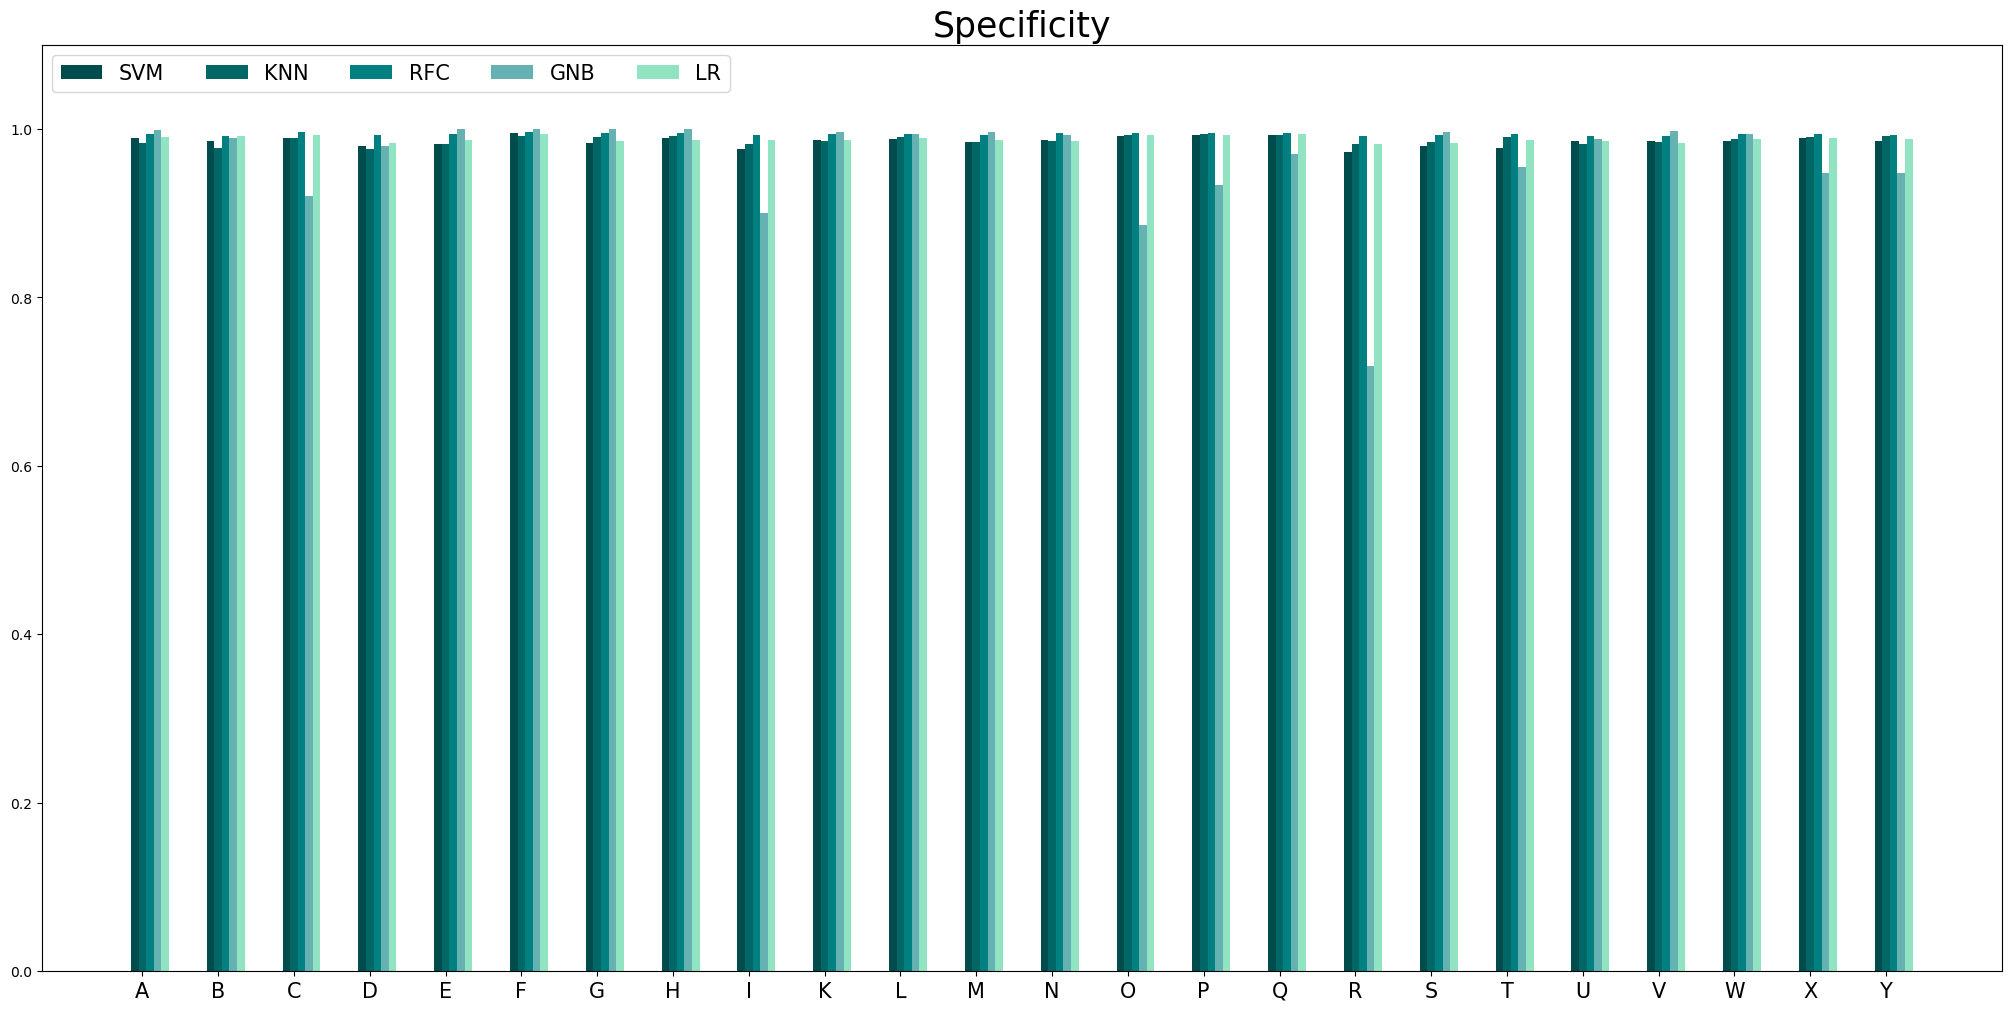

In [7]:
colors = ['#004c4c', '#006666', '#008080', '#66b2b2', '#90E4C1', '#b2d8d8' ]
x = np.arange(len(class_list))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (20, 10))

for attribute, measurement in specificity_metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, color = colors[multiplier])
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Specificity', fontsize = 25)
ax.set_xticks(x + width, class_list, fontsize = 15)
ax.set_ylim(0, 1.1)
ax.legend(classifiers, loc='upper left', fontsize = 15, ncol=len(classifiers))

plt.show()